## Classical simulation of triple dot

This classical simulation of a square dot system (2by2) investigates possible ways to visualize charge states in conventional "honeycomb" fashion. The goal is to investigate if all important points in gate space can be found in a single gate plane.

Also a step-by-step approach for characterizing this dot system is proposed.

### Import packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt

import numpy as np
from qtt.simulation.classicaldotsystem import ClassicalDotSystem, SquareDot

<IPython.core.display.Javascript object>

/Users/laurens/Qcodes/qtt/qtt/pmatlab.py:174: UserWarning: pmatlab: could not load skimage.filters, not all functionality is available
  warnings.warn('pmatlab: could not load skimage.filters, not all functionality is available')


### Initialize dot system

In [2]:
DotSystem = SquareDot(maxelectrons=3)

### Standard Honeycomb example

Let's try a 'standard' honeycomb (i.e. changing 2 plunger gates).

#### Help functions for calculating gate planes

In [3]:
def create_linear_gate_matrix(gate_points, steps_x, steps_y):
    x_y_start = gate_points[0]
    x_end = gate_points[1]
    y_end = gate_points[2]
    step_x = ((x_end-x_y_start) * 1.0 / (steps_x-1))
    step_y = ((y_end-x_y_start) * 1.0 / (steps_y-1))
    return [[start_x+i*step_x for i in range(steps_x)] for start_x in [x_y_start+i*step_y for i in range(steps_y)]]

def calculate_end_points(ref_point,ref_value,dirVecX,dirVecY,rangeX,rangeY):
    gate_points = []
    gate_points.append(ref_value-(rangeX*(1-ref_point[0])*dirVecX)-(rangeY*(1-ref_point[1])*dirVecY))
    gate_points.append(gate_points[0]+rangeX*dirVecX)
    gate_points.append(gate_points[0]+rangeY*dirVecY)
    return gate_points

def create_all_gate_matrix(ref_point, ref_value, dirVecX, dirVecY, rangeX, rangeY, pointsX, pointsY):
    gate_matrix=np.zeros((len(ref_value),pointsX,pointsY))
    for gate in range(len(ref_value)):
        end_points = calculate_end_points(ref_point,ref_value[gate],dirVecX[gate],dirVecY[gate],rangeX,rangeY)
        gate_matrix[gate]= create_linear_gate_matrix(end_points,pointsX,pointsY)
    return gate_matrix

#### Define gate plane and run simulation

[P1,P4] diagram

simulatehoneycomb: 3.46 [s]


<IPython.core.display.Javascript object>


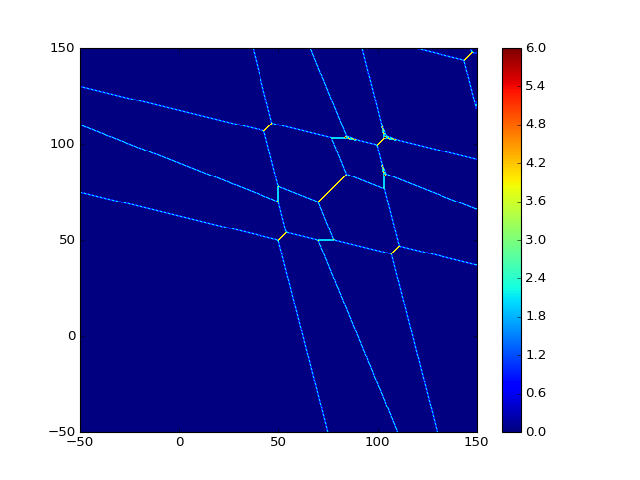

In [7]:
%matplotlib notebook
P1 = 50.0
P2 = 50.0
P3 = 50.0
P4 = 50.0
ref_pt = [0.5, 0.5]
ref_value = [P1, P2, P3, P4]
dirVecY = [0.0, 0.0, 0.0, 1.0]
dirVecX = [1.0, 0.0, 0.0, 0.0]
rangeX = 200
rangeY = 200
pointsX = 400
pointsY = 400

end_points_x = calculate_end_points(ref_pt,ref_value[0],dirVecX[0],dirVecY[0],rangeX,rangeY)
sweepx = np.linspace(end_points_x[0], end_points_x[1], pointsX)

end_points_y = calculate_end_points(ref_pt,ref_value[3],dirVecX[3],dirVecY[3],rangeX,rangeY)
sweepy = np.linspace(end_points_y[0], end_points_y[2], pointsY)

gate_matrix=create_all_gate_matrix(ref_pt, ref_value, dirVecX, dirVecY, rangeX, rangeY, pointsX, pointsY)

DotSystem.simulate_honeycomb(gate_matrix)

fig = plt.figure()
plt.pcolor(sweepx,sweepy,DotSystem.honeycomb)
plt.colorbar()

def onclick(event):
    plt.plot(event.xdata, event.ydata, 'yo')
    gate_point = ref_value
    gate_point[0] = event.xdata
    gate_point[3] = event.ydata
    charge_state = DotSystem.calculate_ground_state(gate_point)
    string = ' ' + np.array_str(charge_state)
    plt.annotate(string, xy = (event.xdata, event.ydata), color = 'y')
    
cid = fig.canvas.mpl_connect('button_press_event', onclick)

The [P1,P4] plane gives a lot of charge states, but not all states are visible and hence not all inter-dot transitions can be found. 

The missing charge states are:
- [0100]
- [0010]
- [1010]
- [0101]
- [1110]
- [0111]

Inter-dot transitions that are missing in this diagram:
- 1..2
- 3..4

[P2,P3] diagram

simulatehoneycomb: 3.80 [s]


<IPython.core.display.Javascript object>


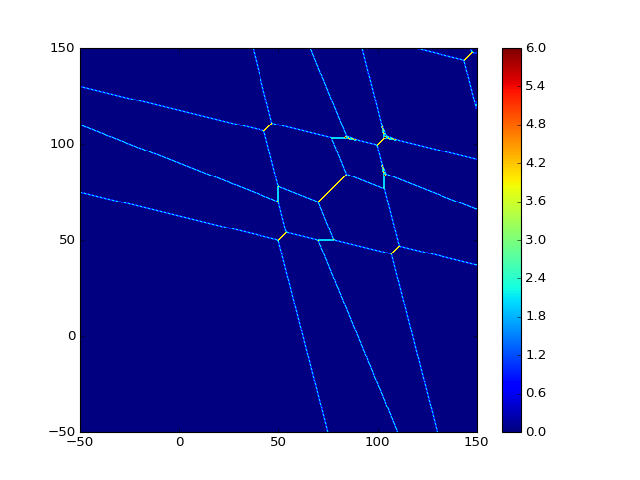

In [8]:
%matplotlib notebook
P1 = 50.0
P2 = 50.0
P3 = 50.0
P4 = 50.0
ref_pt = [0.5, 0.5]
ref_value = [P1, P2, P3, P4]
dirVecY = [0.0, 0.0, 1.0, 0.0]
dirVecX = [0.0, 1.0, 0.0, 0.0]
rangeX = 200
rangeY = 200
pointsX = 400
pointsY = 400

xp = 1
yp = 2

end_points_x = calculate_end_points(ref_pt,ref_value[xp],dirVecX[xp],dirVecY[xp],rangeX,rangeY)
sweepx = np.linspace(end_points_x[0], end_points_x[1], pointsX)

end_points_y = calculate_end_points(ref_pt,ref_value[yp],dirVecX[yp],dirVecY[yp],rangeX,rangeY)
sweepy = np.linspace(end_points_y[0], end_points_y[2], pointsY)

gate_matrix=create_all_gate_matrix(ref_pt, ref_value, dirVecX, dirVecY, rangeX, rangeY, pointsX, pointsY)

DotSystem.simulate_honeycomb(gate_matrix)

fig = plt.figure()
plt.pcolor(sweepx,sweepy,DotSystem.honeycomb)
plt.colorbar()

def onclick(event):
    plt.plot(event.xdata, event.ydata, 'ro')
    gate_point = ref_value
    gate_point[xp] = event.xdata
    gate_point[yp] = event.ydata
    charge_state = DotSystem.calculate_ground_state(gate_point)
    string = ' ' + np.array_str(charge_state)
    plt.annotate(string, xy = (event.xdata, event.ydata), color = 'y')
    
cid = fig.canvas.mpl_connect('button_press_event', onclick)

In the [P2,P3] diagram we can now also see the missing charge states: 
- [0100]
- [0010]
- [1110]
- [0111]

But we are still missing charge states:
- [1010]
- [0101]

And we are also still missing inter-dot transitions:
- 1..2
- 3..4

Let's therefore look at the [P1,P3] diagram:

simulatehoneycomb: 3.16 [s]


<IPython.core.display.Javascript object>


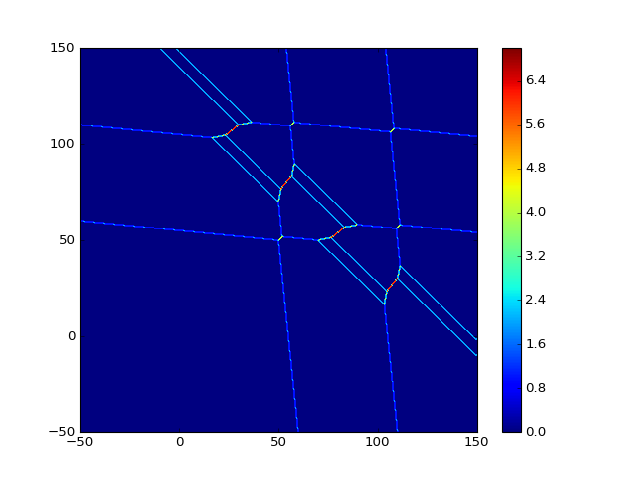

In [6]:
%matplotlib notebook
P1 = 50.0
P2 = 50.0
P3 = 50.0
P4 = 50.0
ref_pt = [0.5, 0.5]
ref_value = [P1, P2, P3, P4]
dirVecY = [0.0, 0.0, 1.0, 0.0]
dirVecX = [1.0, 0.0, 0.0, 0.0]
rangeX = 200
rangeY = 200
pointsX = 400
pointsY = 400

xp = 0
yp = 2

end_points_x = calculate_end_points(ref_pt,ref_value[xp],dirVecX[xp],dirVecY[xp],rangeX,rangeY)
sweepx = np.linspace(end_points_x[0], end_points_x[1], pointsX)

end_points_y = calculate_end_points(ref_pt,ref_value[yp],dirVecX[yp],dirVecY[yp],rangeX,rangeY)
sweepy = np.linspace(end_points_y[0], end_points_y[2], pointsY)

gate_matrix=create_all_gate_matrix(ref_pt, ref_value, dirVecX, dirVecY, rangeX, rangeY, pointsX, pointsY)

DotSystem.simulate_honeycomb(gate_matrix)

fig = plt.figure()
plt.pcolor(sweepx,sweepy,DotSystem.honeycomb)
plt.colorbar()

def onclick(event):
    plt.plot(event.xdata, event.ydata, 'go')
    gate_point = ref_value
    gate_point[xp] = event.xdata
    gate_point[yp] = event.ydata
    charge_state = DotSystem.calculate_ground_state(gate_point)
    string = ' ' + np.array_str(charge_state)
    plt.annotate(string, xy = (event.xdata, event.ydata), color = 'y')
    
cid = fig.canvas.mpl_connect('button_press_event', onclick)

In the [P2,P3] diagram we can now also see the missing charge state: 
- [1010]

And we can finally find inter-dot transitions:
- 1..2
- 3..4

But we are still missing charge state:
- [0101]

## Step-by-step characterization

### Characterization essentials

For the characterization of a square dot system, consisting of 4 dots, we need to measure:
- Gate-map (gate-to-dot capacitances) (4x12)
- Addition energy of each dot (4x)
- Capacitive coupling between each dot (6x)
- Tunnel coupling between each dot (6x)

In order to perform the measurements needed for characterization, we need a set of gate points (points in gate-space) at:
- Single dot addition (4x)
- Inter-dot transition (6x)
- Coulomb blockade (1x)

This total of 11 points in gate-space is hard to find in a single charge state diagram. We will therefore use multiple charge state diagrams to pinpoint all 11 points in gate-space.

### Inter-dot transitions

The total of 6 inter-dot transitions can be found by combining two plunger-planes: [P1,P4] and [P1,P3].

The 6 points are marked with a red dot.

simulatehoneycomb: 3.30 [s]


<IPython.core.display.Javascript object>


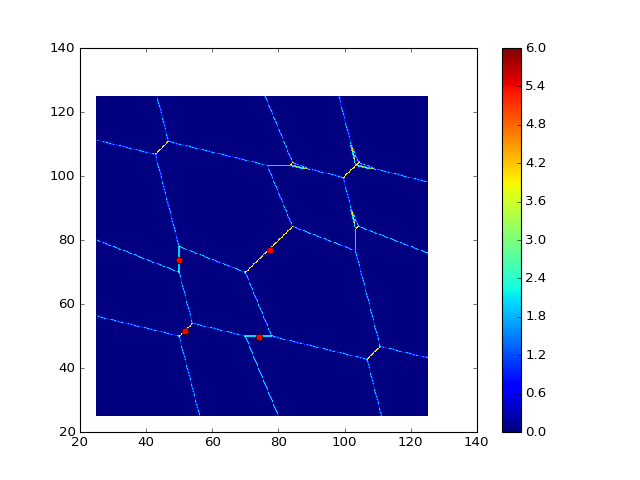

In [13]:
%matplotlib notebook
P1 = 50.0
P2 = 50.0
P3 = 50.0
P4 = 50.0
ref_pt = [0.75, 0.75]
ref_value = [P1, P2, P3, P4]
dirVecY = [0.0, 0.0, 0.0, 1.0]
dirVecX = [1.0, 0.0, 0.0, 0.0]
rangeX = 100
rangeY = 100
pointsX = 400
pointsY = 400

xp = 0
yp = 3

end_points_x = calculate_end_points(ref_pt,ref_value[xp],dirVecX[xp],dirVecY[xp],rangeX,rangeY)
sweepx = np.linspace(end_points_x[0], end_points_x[1], pointsX)

end_points_y = calculate_end_points(ref_pt,ref_value[yp],dirVecX[yp],dirVecY[yp],rangeX,rangeY)
sweepy = np.linspace(end_points_y[0], end_points_y[2], pointsY)

gate_matrix=create_all_gate_matrix(ref_pt, ref_value, dirVecX, dirVecY, rangeX, rangeY, pointsX, pointsY)

DotSystem.simulate_honeycomb(gate_matrix)

fig = plt.figure()
plt.pcolor(sweepx,sweepy,DotSystem.honeycomb)
plt.colorbar()

def onclick(event):
    plt.plot(event.xdata, event.ydata, 'ro')
    gate_point = ref_value
    gate_point[xp] = event.xdata
    gate_point[yp] = event.ydata
    charge_state = DotSystem.calculate_ground_state(gate_point)
    string = ' ' + np.array_str(charge_state)
    #plt.annotate(string, xy = (event.xdata, event.ydata), color = 'y')
    
cid = fig.canvas.mpl_connect('button_press_event', onclick)

simulatehoneycomb: 3.62 [s]


<IPython.core.display.Javascript object>


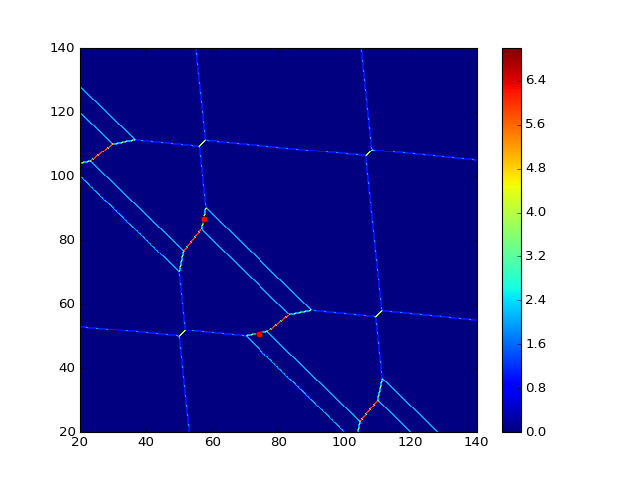

In [16]:
%matplotlib notebook
P1 = 50.0
P2 = 50.0
P3 = 50.0
P4 = 50.0
ref_pt = [0.75, 0.75]
ref_value = [P1, P2, P3, P4]
dirVecY = [0.0, 0.0, 1.0, 0.0]
dirVecX = [1.0, 0.0, 0.0, 0.0]
rangeX = 120
rangeY = 120
pointsX = 400
pointsY = 400

xp = 0
yp = 2

end_points_x = calculate_end_points(ref_pt,ref_value[xp],dirVecX[xp],dirVecY[xp],rangeX,rangeY)
sweepx = np.linspace(end_points_x[0], end_points_x[1], pointsX)

end_points_y = calculate_end_points(ref_pt,ref_value[yp],dirVecX[yp],dirVecY[yp],rangeX,rangeY)
sweepy = np.linspace(end_points_y[0], end_points_y[2], pointsY)

gate_matrix=create_all_gate_matrix(ref_pt, ref_value, dirVecX, dirVecY, rangeX, rangeY, pointsX, pointsY)

DotSystem.simulate_honeycomb(gate_matrix)

fig = plt.figure()
plt.pcolor(sweepx,sweepy,DotSystem.honeycomb)
plt.colorbar()

def onclick(event):
    plt.plot(event.xdata, event.ydata, 'ro')
    gate_point = ref_value
    gate_point[xp] = event.xdata
    gate_point[yp] = event.ydata
    charge_state = DotSystem.calculate_ground_state(gate_point)
    string = ' ' + np.array_str(charge_state)
    #plt.annotate(string, xy = (event.xdata, event.ydata), color = 'y')
    
cid = fig.canvas.mpl_connect('button_press_event', onclick)

### Single dot addition lines

All four dot transition lines can be found in the [P1,P4] plunger-plane. The 4 points are marked with a yellow dot.

simulatehoneycomb: 3.82 [s]


<IPython.core.display.Javascript object>


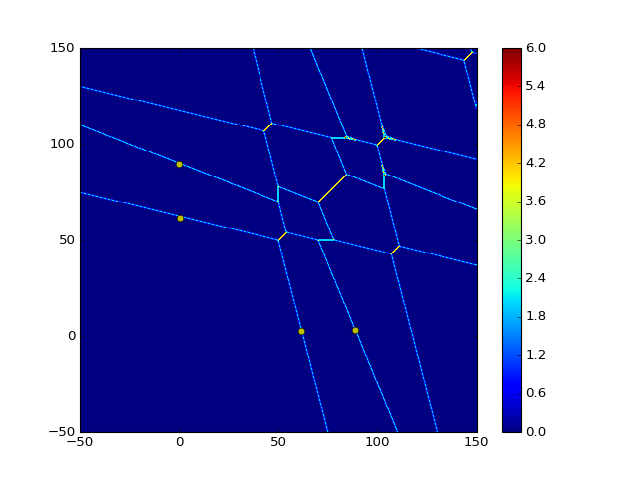

In [18]:
%matplotlib notebook
P1 = 50.0
P2 = 50.0
P3 = 50.0
P4 = 50.0
ref_pt = [0.5, 0.5]
ref_value = [P1, P2, P3, P4]
dirVecY = [0.0, 0.0, 0.0, 1.0]
dirVecX = [1.0, 0.0, 0.0, 0.0]
rangeX = 200
rangeY = 200
pointsX = 400
pointsY = 400

xp = 0
yp = 3

end_points_x = calculate_end_points(ref_pt,ref_value[xp],dirVecX[xp],dirVecY[xp],rangeX,rangeY)
sweepx = np.linspace(end_points_x[0], end_points_x[1], pointsX)

end_points_y = calculate_end_points(ref_pt,ref_value[yp],dirVecX[yp],dirVecY[yp],rangeX,rangeY)
sweepy = np.linspace(end_points_y[0], end_points_y[2], pointsY)

gate_matrix=create_all_gate_matrix(ref_pt, ref_value, dirVecX, dirVecY, rangeX, rangeY, pointsX, pointsY)

DotSystem.simulate_honeycomb(gate_matrix)

fig = plt.figure()
plt.pcolor(sweepx,sweepy,DotSystem.honeycomb)
plt.colorbar()

def onclick(event):
    plt.plot(event.xdata, event.ydata, 'yo')
    gate_point = ref_value
    gate_point[xp] = event.xdata
    gate_point[yp] = event.ydata
    charge_state = DotSystem.calculate_ground_state(gate_point)
    string = ' ' + np.array_str(charge_state)
    #plt.annotate(string, xy = (event.xdata, event.ydata), color = 'y')
    
cid = fig.canvas.mpl_connect('button_press_event', onclick)

### Coulomb blockade

The centre of the [1111] charge state gives us the dot system in Coulomb blockade. This point in gate-space can be found in most gate-planes, but an example using the same [P1,P4] plane is used. The gate-point is marked with a green dot.

simulatehoneycomb: 3.65 [s]


<IPython.core.display.Javascript object>


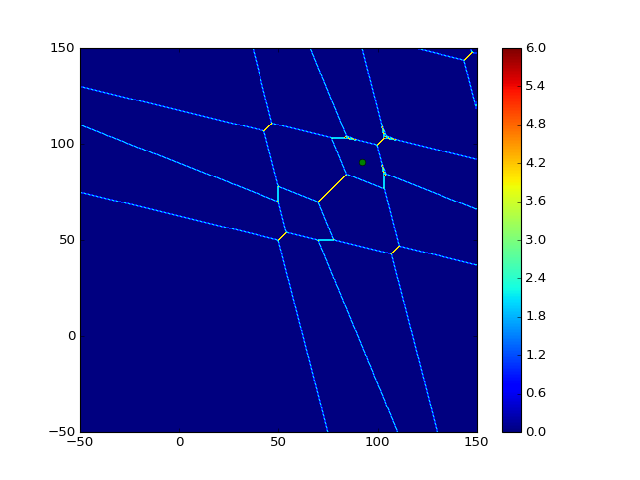

In [19]:
%matplotlib notebook
P1 = 50.0
P2 = 50.0
P3 = 50.0
P4 = 50.0
ref_pt = [0.5, 0.5]
ref_value = [P1, P2, P3, P4]
dirVecY = [0.0, 0.0, 0.0, 1.0]
dirVecX = [1.0, 0.0, 0.0, 0.0]
rangeX = 200
rangeY = 200
pointsX = 400
pointsY = 400

xp = 0
yp = 3

end_points_x = calculate_end_points(ref_pt,ref_value[xp],dirVecX[xp],dirVecY[xp],rangeX,rangeY)
sweepx = np.linspace(end_points_x[0], end_points_x[1], pointsX)

end_points_y = calculate_end_points(ref_pt,ref_value[yp],dirVecX[yp],dirVecY[yp],rangeX,rangeY)
sweepy = np.linspace(end_points_y[0], end_points_y[2], pointsY)

gate_matrix=create_all_gate_matrix(ref_pt, ref_value, dirVecX, dirVecY, rangeX, rangeY, pointsX, pointsY)

DotSystem.simulate_honeycomb(gate_matrix)

fig = plt.figure()
plt.pcolor(sweepx,sweepy,DotSystem.honeycomb)
plt.colorbar()

def onclick(event):
    plt.plot(event.xdata, event.ydata, 'go')
    gate_point = ref_value
    gate_point[xp] = event.xdata
    gate_point[yp] = event.ydata
    charge_state = DotSystem.calculate_ground_state(gate_point)
    string = ' ' + np.array_str(charge_state)
    #plt.annotate(string, xy = (event.xdata, event.ydata), color = 'y')
    
cid = fig.canvas.mpl_connect('button_press_event', onclick)

### Gate-map (a.k.a. virtual gate matrix)

Now we will use a combination of earlier found inter-dot transition points and single-dot addition points to make the gate-map.

First, a set of 6 avoided crossing measurements are done at the inter-dot transition points. Each avoided crossing measurement can be fitted to give 3 elements of the virtual gate matrix. An example avoided crossing measurement at the 1..4 inter-dot transition is shown:

simulatehoneycomb: 3.34 [s]


<IPython.core.display.Javascript object>


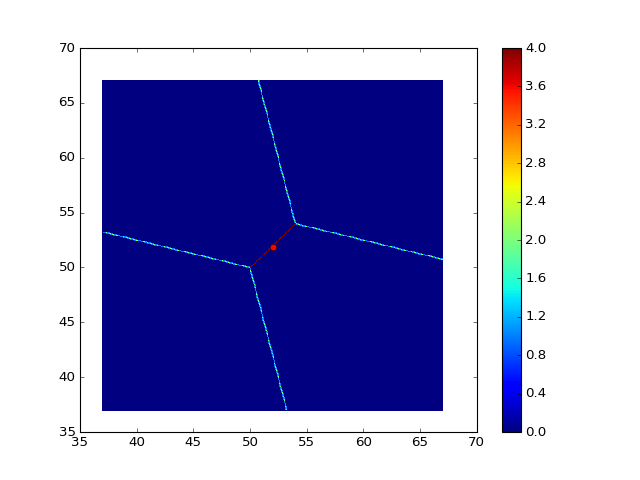

In [22]:
%matplotlib notebook
P1 = 52.0
P2 = 50.0
P3 = 50.0
P4 = 52.0
ref_pt = [0.5, 0.5]
ref_value = [P1, P2, P3, P4]
dirVecY = [0.0, 0.0, 0.0, 1.0]
dirVecX = [1.0, 0.0, 0.0, 0.0]
rangeX = 30
rangeY = 30
pointsX = 400
pointsY = 400

xp = 0
yp = 3

end_points_x = calculate_end_points(ref_pt,ref_value[xp],dirVecX[xp],dirVecY[xp],rangeX,rangeY)
sweepx = np.linspace(end_points_x[0], end_points_x[1], pointsX)

end_points_y = calculate_end_points(ref_pt,ref_value[yp],dirVecX[yp],dirVecY[yp],rangeX,rangeY)
sweepy = np.linspace(end_points_y[0], end_points_y[2], pointsY)

gate_matrix=create_all_gate_matrix(ref_pt, ref_value, dirVecX, dirVecY, rangeX, rangeY, pointsX, pointsY)

DotSystem.simulate_honeycomb(gate_matrix)

fig = plt.figure()
plt.pcolor(sweepx,sweepy,DotSystem.honeycomb)
plt.colorbar()

def onclick(event):
    plt.plot(event.xdata, event.ydata, 'ro')
    gate_point = ref_value
    gate_point[xp] = event.xdata
    gate_point[yp] = event.ydata
    charge_state = DotSystem.calculate_ground_state(gate_point)
    string = ' ' + np.array_str(charge_state)
    #plt.annotate(string, xy = (event.xdata, event.ydata), color = 'y')
    
cid = fig.canvas.mpl_connect('button_press_event', onclick)

Next,